In [277]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy import misc
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

In [325]:
def make_moving_square(frames):
    square = np.ones((100,100))
    empty = np.zeros((200,100))
    square = np.concatenate((empty,square,empty), axis=0)
    video = []
    time = np.linspace(0,1,frames)
    for idx in time:
        left = np.zeros((500, int(np.ceil(idx*400))))
        right = np.zeros((500, int(np.floor((1-idx)*400))))
        img = np.concatenate((left, square, right), axis = 1)
        video.append(img)
    return video

def make_rotating_square(frames,percent,theta):
    square = np.ones((100,100))
    empty = np.zeros((200,100))
    square = np.concatenate((empty,square,empty), axis=0)
    idx = percent
    left = np.zeros((500, int(np.ceil(idx*400))))
    right = np.zeros((500, int(np.floor((1-idx)*400))))
    square = np.concatenate((left, square, right), axis = 1)
    
    video = []
    time = np.linspace(0,theta,frames)
    for angle in time:
        img = ndimage.interpolation.rotate(square, angle, reshape=False)
        video.append(img)
    return video

num_frame = 100
video = make_rotating_square(num_frame, 0.4, 360)
#plt.imshow(video[5])

vec_img = [f.reshape((1, -1)) for f in video]
X = np.concatenate(vec_img,axis = 0)
labels = range(0,num_frame)

In [326]:
n_neighbors = 2
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)

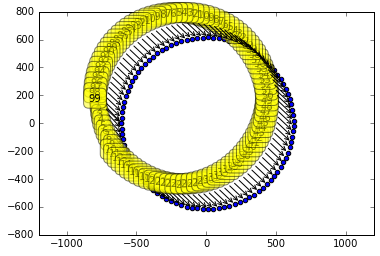

In [327]:
plt.scatter(X_iso[:,0], X_iso[:,1])
plt.axis('equal')
labels = range(0,num_frame)
for label, x, y in zip(labels, X_iso[:, 0], X_iso[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
